# Data analysis of assignment 2 files

Files provided

- `data_1111.txt`
- `data_2222.txt`
- `data_3333.txt`

More files provided??

- `data_1.txt`
- `data_2.txt`
- `data_3.txt`
- `data_4.txt`
- `data_5.txt`

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import csv
import subprocess as sp
from test_generation import perform_random_tests

%load_ext autoreload
%autoreload 2

plt.rc("figure", figsize=(9, 7))
plt.rc("font", size=14)

Defined `dfs` as a dictionary of data file IDs associated with the corresponding data in tabulated (`pd.DataFrame`) format.

In [4]:
dfs = {}

for data_file_path in pathlib.Path("..").glob("data_*.txt"):
    dfs[data_file_path.name[len("data_") : -len(".txt")]] \
      = pd.read_csv(data_file_path, delimiter=' ', header=None, names=["customer id", "priority", "arrival time", "burst time"])

Consolidate data

In [5]:
all_data = pd.concat(dfs.values(), ignore_index=True)
all_data

,customer id,priority,arrival time,burst time
0,c00,1,2,5
1,c01,0,2,16
2,c02,1,10,6
3,c03,1,13,16
4,c04,1,27,22
...,...,...,...,...
395,c45,1,184,3
396,c46,0,186,23
397,c47,1,193,11
398,c48,1,193,21


## Exploring distributions of arrival time, burst time, and priority

Below are graphs showing arrival time, priority, and burst time distributions across all the provided input data files:

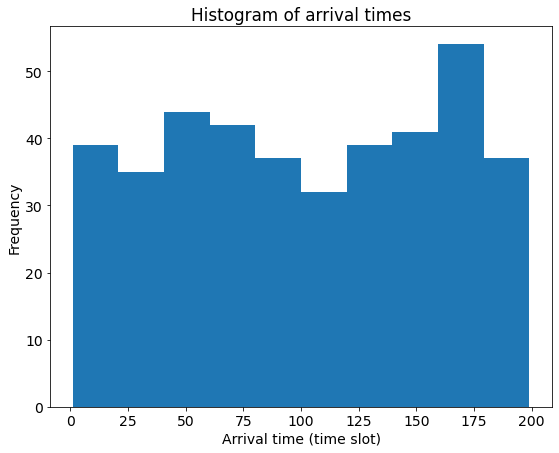

In [6]:
plt.hist(all_data["arrival time"])
plt.title("Histogram of arrival times")
plt.ylabel("Frequency")
plt.xlabel("Arrival time (time slot)")

plt.show()

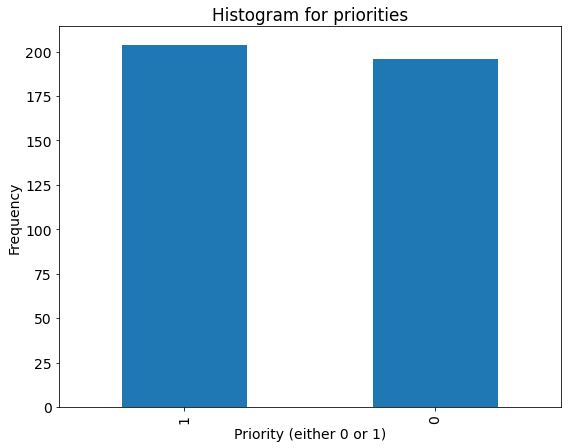

In [7]:
all_data["priority"].value_counts().plot.bar()
plt.title("Histogram for priorities")
plt.ylabel("Frequency")
plt.xlabel("Priority (either 0 or 1)")

plt.show()

Text(0.5, 0, 'Burst time')

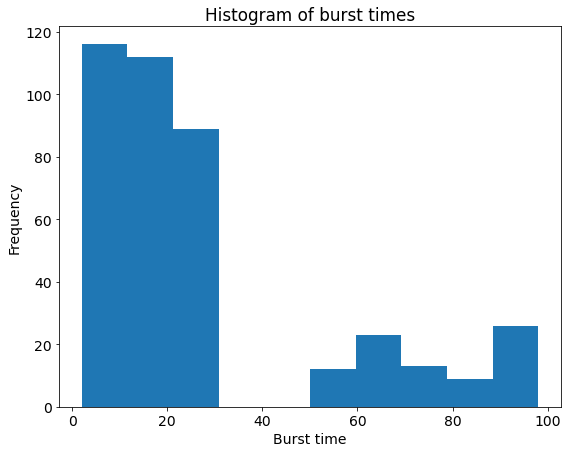

In [8]:
plt.hist(all_data["burst time"])
plt.title("Histogram of burst times")
plt.ylabel("Frequency")
plt.xlabel("Burst time")

## Exploring differences of lower and upper burst time distributions

It is clear from the histogram above that we can try separating burst time data as either points below 40 or points above 40.

Results below show that approximately 20\% of the burst times fall on the upper bins and approximately 80\% of the burst times fall on the lower bins. As seen in the figure above, the burst times appear to be uniformly distributed.

In [9]:
burst_time_lt_40 = all_data[all_data["burst time"] < 40]["burst time"]
burst_time_gt_40 = all_data[all_data["burst time"] > 40]["burst time"]

print("less than 40:", burst_time_lt_40.count(), burst_time_lt_40.count() / len(all_data))
print("greater than 40:", burst_time_gt_40.count(), burst_time_gt_40.count() / len(all_data))

less than 40: 317 0.7925
greater than 40: 83 0.2075


Range of burst times on the lower end appear to be 2 to 30 (a burst time of 0 would not make sense).

In [10]:
burst_time_lt_40.describe()

count    317.000000
mean      15.384858
std        8.043208
min        2.000000
25%        9.000000
50%       15.000000
75%       22.000000
max       29.000000
Name: burst time, dtype: float64

Range of burst times on the higher end appear to be 50 to 100.

In [11]:
burst_time_gt_40.describe()

count    83.000000
mean     76.060241
std      14.652353
min      50.000000
25%      64.500000
50%      74.000000
75%      90.500000
max      98.000000
Name: burst time, dtype: float64

## Exploring whether different priorities result in different arrival/burst times (this is not the case)

Priority does not determine burst time.

Text(0.5, 0, 'Burst time')

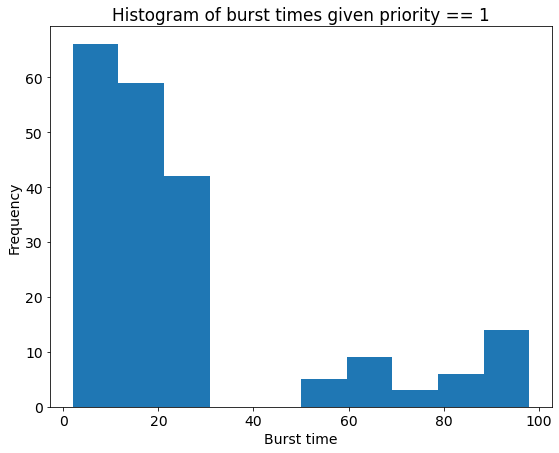

In [12]:
plt.hist(all_data.query("priority == 1")["burst time"])
plt.title("Histogram of burst times given priority == 1")
plt.ylabel("Frequency")
plt.xlabel("Burst time")

Text(0.5, 0, 'Burst time')

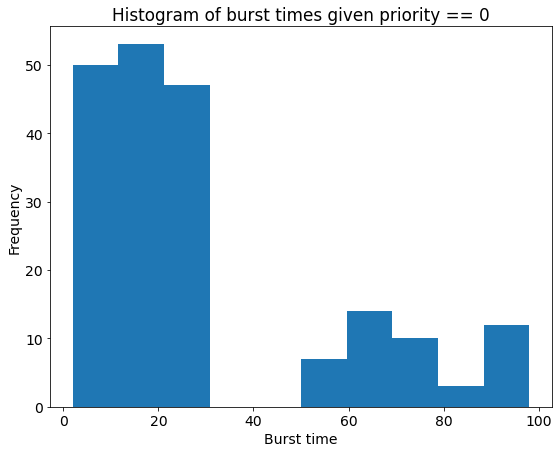

In [13]:
plt.hist(all_data.query("priority == 0")["burst time"])
plt.title("Histogram of burst times given priority == 0")
plt.ylabel("Frequency")
plt.xlabel("Burst time")

Priority does not determine arrival time.

Text(0.5, 0, 'Arrival time')

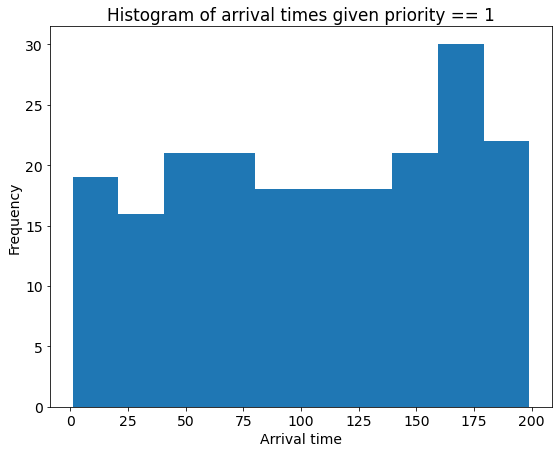

In [14]:
plt.hist(all_data.query("priority == 1")["arrival time"])
plt.title("Histogram of arrival times given priority == 1")
plt.ylabel("Frequency")
plt.xlabel("Arrival time")

Text(0.5, 0, 'arrival time')

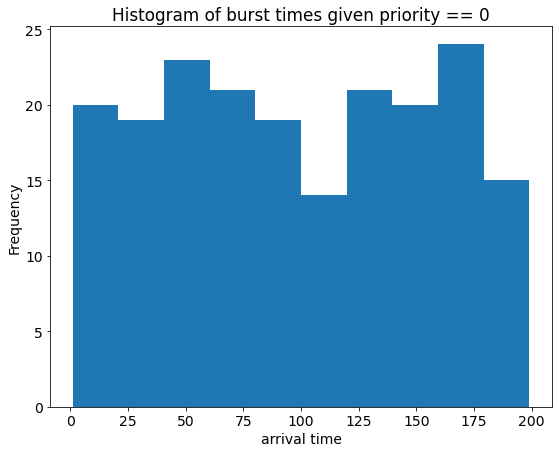

In [15]:
plt.hist(all_data.query("priority == 0")["arrival time"])
plt.title("Histogram of burst times given priority == 0")
plt.ylabel("Frequency")
plt.xlabel("arrival time")

# Random testing results

## Result generation

In [18]:
# parameters
num_random_tests = 100
min_num_customers = 0
max_num_customers = 99

In [19]:
header = "num_customers,num_random_tests,num_failures,num_successes,num_0_wait_time_fails,num_wait_time_fails,num_response_time_fails,num_switch_fails"

### Varying time allowance

In [ ]:
for time_allowance in [0]:
    print(f"gathering data for time_allowance={time_allowance}")
    
    # Replace line defining TIME_ALLOWANCE in scheduler.cpp and recompile everything with Makefile.
    lines = []
    with open("../scheduler.cpp", 'r') as f:
        lines = f.readlines()

    lines[7] = f"const int TIME_ALLOWANCE = {time_allowance};\n"

    with open("../scheduler.cpp", 'w') as f:
        f.writelines(lines)

    sp.run(["make", "-C.."])

    # Create output file
    output_file = f"../data/multilevel_srtf_time_allowance_{time_allowance}_results.csv"

    with open(output_file, 'w') as f:
        f.write(header + '\n')

    # Perform 1000 random tests for num_customers = 0,1,...,99, then append results to output file
    with open(output_file, 'a') as f:
        print(f"performing random tests for num_customers = ", end='', flush=True)
        for num_customers in range(min_num_customers, max_num_customers+1):
            print(f"{num_customers}, ", end='', flush=True)
            results = perform_random_tests(num_customers=num_customers, 
                                           num_random_tests=num_random_tests,
                                           scheduler_path = "../scheduler",
                                           baseline_path = "../baseline",
                                           compute_stats_path = "../compute_stats",
                                           log=False)
            
            # consolidate numerical results into a line, separated by comma
            res_txt = [str(results[k]) for k in results.keys()]
            res_txt = ','.join(res_txt)
            res_txt += '\n'
            
            f.write(res_txt)
        print()

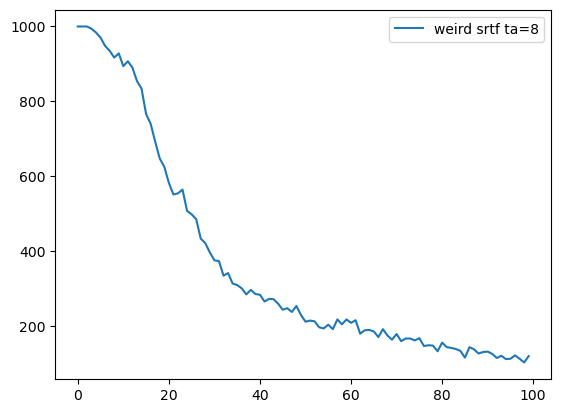

In [18]:
for t in range(8, 11):
    df = pd.read_csv(f"../data/weird_multilevel_srtf_time_allowance_{t}_results.csv")
    plt.plot(df["num_customers"], df["num_failures"], label=f"weird srtf ta={t}")
    
plt.legend()
plt.show()

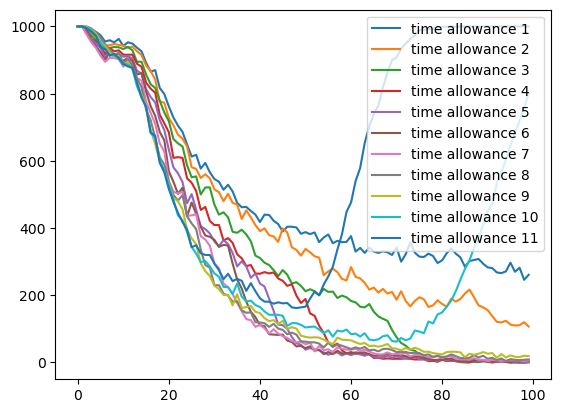

In [17]:
for t in range(1, 12):
    df = pd.read_csv(f"../data/multilevel_srtf_time_allowance_{t}_results.csv")
    
    plt.plot(df["num_customers"], df["num_failures"], label=f"time allowance {t}")
    
plt.legend()
plt.show()

## Larger or equal response times and wait times in multilevel queue SRTF is main contributor to failures

Also: `time_allowance == 8` or `time_allowance == 9` appear to be optimal

In [52]:
time_allowance = 8

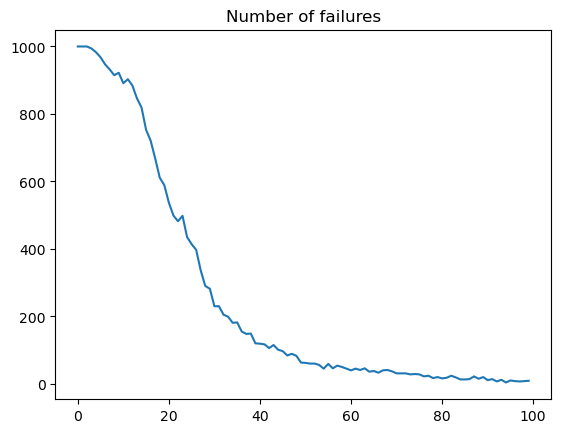

In [60]:
df = pd.read_csv(f"../data/multilevel_srtf_time_allowance_{time_allowance}_results.csv")

plt.title("Number of failures")
plt.plot(df["num_customers"], df["num_failures"])
plt.show()

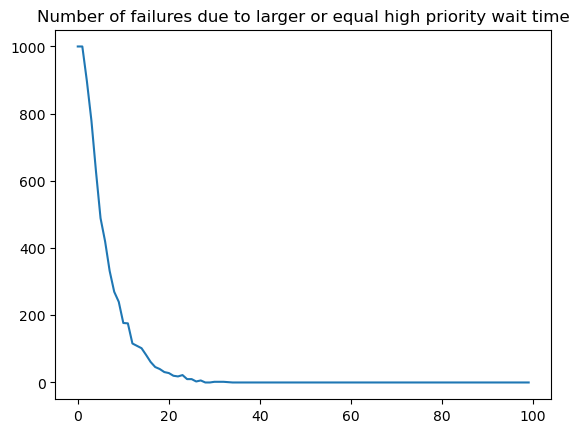

In [61]:
df = pd.read_csv(f"../data/multilevel_srtf_time_allowance_{time_allowance}_results.csv")

plt.title("Number of failures due to larger or equal high priority wait time")
plt.plot(df["num_customers"], df["num_0_wait_time_fails"])
plt.show()

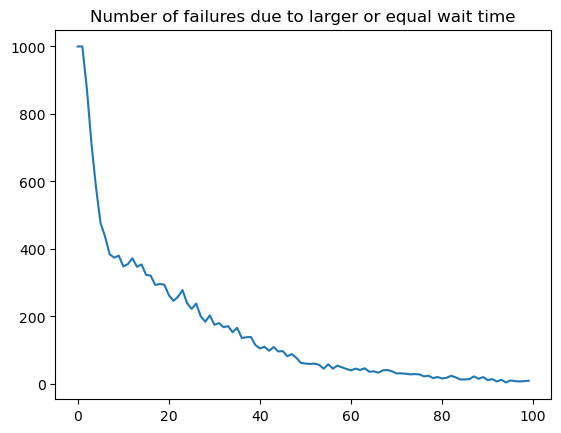

In [62]:
df = pd.read_csv(f"../data/multilevel_srtf_time_allowance_{time_allowance}_results.csv")

plt.title("Number of failures due to larger or equal wait time")
plt.plot(df["num_customers"], df["num_wait_time_fails"])
plt.show()

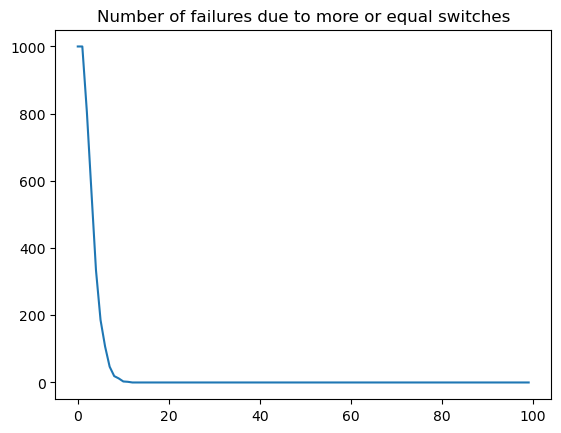

In [63]:
df = pd.read_csv(f"../data/multilevel_srtf_time_allowance_{time_allowance}_results.csv")

plt.title("Number of failures due to more or equal switches")
plt.plot(df["num_customers"], df["num_switch_fails"])
plt.show()

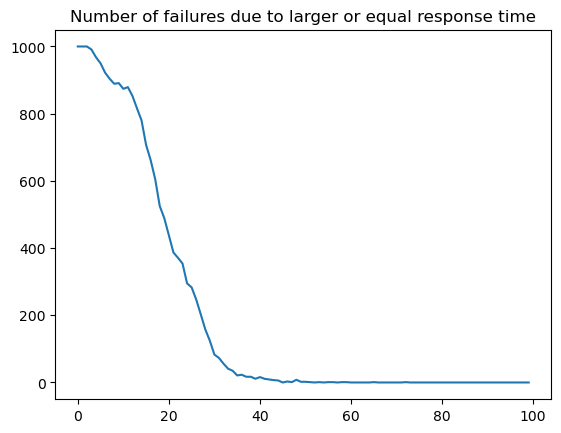

In [64]:
df = pd.read_csv(f"../data/multilevel_srtf_time_allowance_{time_allowance}_results.csv")

plt.title("Number of failures due to larger or equal response time")
plt.plot(df["num_customers"], df["num_response_time_fails"])
plt.show()